# Assignment 15 Solution

**1. Deep Learning.**

**a. Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.**

**b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.**

**c. Tune the hyperparameters using cross-validation and see what precision you can achieve.**

**d. Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?**

**e. Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?**

**Ans: a. Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function.**

In [4]:
import tensorflow as tf
from functools import partial

In [5]:
# Define the number of inputs and outputs
n_inputs = 28 * 28 # MNIST
n_outputs = 10

In [6]:
# Define the number of neurons in each hidden layer
n_hidden1 = 100
n_hidden2 = 100
n_hidden3 = 100
n_hidden4 = 100
n_hidden5 = 100

In [7]:
# Define the initializer and activation function to use
he_init = tf.keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
elu_activation = tf.keras.activations.elu

In [8]:
# Create the model using the Sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), # Flatten the input data
    tf.keras.layers.Dense(n_hidden1, activation=elu_activation, kernel_initializer=he_init), # First hidden layer
    tf.keras.layers.Dense(n_hidden2, activation=elu_activation, kernel_initializer=he_init), # Second hidden layer
    tf.keras.layers.Dense(n_hidden3, activation=elu_activation, kernel_initializer=he_init), # Third hidden layer
    tf.keras.layers.Dense(n_hidden4, activation=elu_activation, kernel_initializer=he_init), # Fourth hidden layer
    tf.keras.layers.Dense(n_hidden5, activation=elu_activation, kernel_initializer=he_init), # Fifth hidden layer
    tf.keras.layers.Dense(n_outputs) # Output layer
])

C:\Users\hrush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


**b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.**

**Ans:**

In [10]:
from tensorflow import keras
import numpy as np

In [11]:
# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
# Scale the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [13]:
# Create a validation set and training set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
# Only keep digits 0 to 4 in the training and validation sets
X_train = X_train[y_train < 5]
y_train = y_train[y_train < 5]
X_valid = X_valid[y_valid < 5]
y_valid = y_valid[y_valid < 5]

In [15]:
# Build the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
])

In [16]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [17]:
# Define early stopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/30
877/877 [==============================] - 4s 3ms/step - loss: 0.0969 - accuracy: 0.9705 - val_loss: 0.0434 - val_accuracy: 0.9859
Epoch 2/30
877/877 [==============================] - 2s 3ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0411 - val_accuracy: 0.9867
Epoch 3/30
877/877 [==============================] - 2s 3ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0315 - val_accuracy: 0.9910
Epoch 4/30
877/877 [==============================] - 2s 3ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0347 - val_accuracy: 0.9898
Epoch 5/30
877/877 [==============================] - 2s 3ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 6/30
877/877 [==============================] - 2s 3ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0262 - val_accuracy: 0.9922
Epoch 7/30
877/877 [==============================] - 2s 3ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0258 - val_accuracy: 0.9930
Epoch 

In [19]:
# Save the final model
model.save("my_mnist_model.h5")

**c. Tune the hyperparameters using cross-validation and see what precision you can achieve.**

**Ans:**

In [20]:
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer
import numpy as np

In [21]:
# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
# Scale the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

In [23]:
# Create a validation set and training set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [24]:
# Only keep digits 0 to 4 in the training and validation sets
X_train = X_train[y_train < 5]
y_train = y_train[y_train < 5]
X_valid = X_valid[y_valid < 5]
y_valid = y_valid[y_valid < 5]

In [25]:
# Build a function to create the model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(5, activation="softmax"))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [26]:
# Create a KerasClassifier object
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

C:\Users\hrush\AppData\Local\Temp\ipykernel_3096\3906373099.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [27]:
# Define the hyperparameters to search over
param_grid = {
    "n_hidden": [1, 2],
    "n_neurons": [10, 30],
    "learning_rate": [3e-4, 3e-3]
}

In [28]:
# Create a GridSearchCV object
grid_search_cv = GridSearchCV(keras_clf, param_grid,
                              cv=3,
                              scoring=make_scorer(precision_score,
                                                  average='weighted'))

In [29]:
# Fit the GridSearchCV object to the data
grid_search_cv.fit(X_train, y_train,
                   validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

293/293 [==============================] - 1s 1ms/step


293/293 [==============================] - 0s 975us/step


293/293 [==============================] - 0s 982us/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 782us/step


293/293 [==============================] - 0s 756us/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 988us/step


293/293 [==============================] - 0s 984us/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 941us/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


293/293 [==============================] - 0s 1ms/step


877/877 [==============================] - 3s 2ms/step - loss: 0.1618 - accuracy: 0.9525 - val_loss: 0.0825 - val_accuracy: 0.9773


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021F67876650>,
             param_grid={'learning_rate': [0.0003, 0.003], 'n_hidden': [1, 2],
                         'n_neurons': [10, 30]},
             scoring=make_scorer(precision_score, average=weighted))

In [30]:
# Print the best hyperparameters
print(grid_search_cv.best_params_)

{'learning_rate': 0.003, 'n_hidden': 2, 'n_neurons': 30}


**d. Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?**

**Ans:**

In [31]:
# Build DNN with Batch Normalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation="softmax")
])

In [32]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [33]:
# Train model
history_bn = model.fit(X_train, y_train, epochs=100, batch_size=32,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb])

Epoch 1/100
877/877 [==============================] - 7s 4ms/step - loss: 0.1274 - accuracy: 0.9608 - val_loss: 0.0655 - val_accuracy: 0.9781
Epoch 2/100
877/877 [==============================] - 3s 3ms/step - loss: 0.0608 - accuracy: 0.9806 - val_loss: 0.0479 - val_accuracy: 0.9836
Epoch 3/100
877/877 [==============================] - 3s 4ms/step - loss: 0.0468 - accuracy: 0.9848 - val_loss: 0.0370 - val_accuracy: 0.9898
Epoch 4/100
877/877 [==============================] - 3s 3ms/step - loss: 0.0345 - accuracy: 0.9887 - val_loss: 0.0380 - val_accuracy: 0.9894
Epoch 5/100
877/877 [==============================] - 3s 4ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0343 - val_accuracy: 0.9891
Epoch 6/100
877/877 [==============================] - 3s 4ms/step - loss: 0.0309 - accuracy: 0.9896 - val_loss: 0.0359 - val_accuracy: 0.9898
Epoch 7/100
877/877 [==============================] - 3s 3ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0337 - val_accuracy: 0.9910

In [34]:
import matplotlib.pyplot as plt

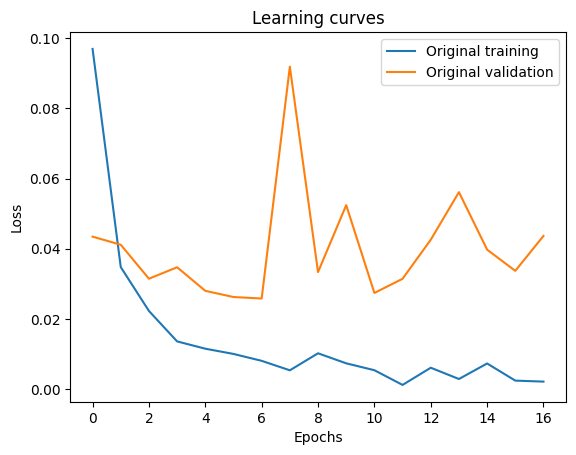

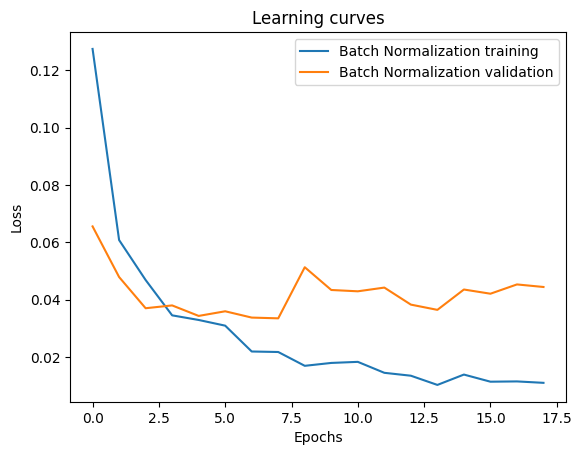

In [35]:
# Plot learning curves
def plot_learning_curves(history, label=None):
    plt.plot(history.history["loss"], label=label + " training")
    plt.plot(history.history["val_loss"], label=label + " validation")
    plt.legend()
    plt.title("Learning curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

plot_learning_curves(history, label="Original")
plot_learning_curves(history_bn, label="Batch Normalization")

**e. Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?**

**Ans:**

In [36]:
# Build DNN with Dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(5, activation="softmax")
])

In [37]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [38]:
# Train model
history_dropout = model.fit(X_train, y_train, epochs=100, batch_size=32,
                            validation_data=(X_valid, y_valid),
                            callbacks=[early_stopping_cb])

Epoch 1/100
877/877 [==============================] - 5s 4ms/step - loss: 0.2207 - accuracy: 0.9318 - val_loss: 0.0899 - val_accuracy: 0.9707
Epoch 2/100
877/877 [==============================] - 3s 3ms/step - loss: 0.1267 - accuracy: 0.9610 - val_loss: 0.0725 - val_accuracy: 0.9777
Epoch 3/100
877/877 [==============================] - 3s 3ms/step - loss: 0.0949 - accuracy: 0.9713 - val_loss: 0.0538 - val_accuracy: 0.9840
Epoch 4/100
877/877 [==============================] - 3s 4ms/step - loss: 0.0803 - accuracy: 0.9751 - val_loss: 0.0460 - val_accuracy: 0.9855
Epoch 5/100
877/877 [==============================] - 3s 4ms/step - loss: 0.0727 - accuracy: 0.9776 - val_loss: 0.0389 - val_accuracy: 0.9871
Epoch 6/100
877/877 [==============================] - 3s 3ms/step - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0361 - val_accuracy: 0.9863
Epoch 7/100
877/877 [==============================] - 3s 4ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0341 - val_accuracy: 0.9887

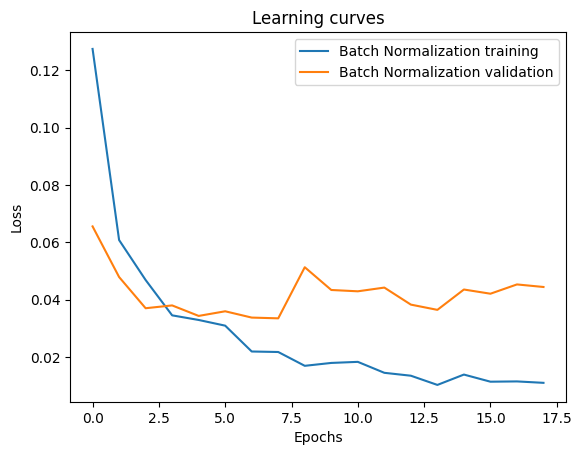

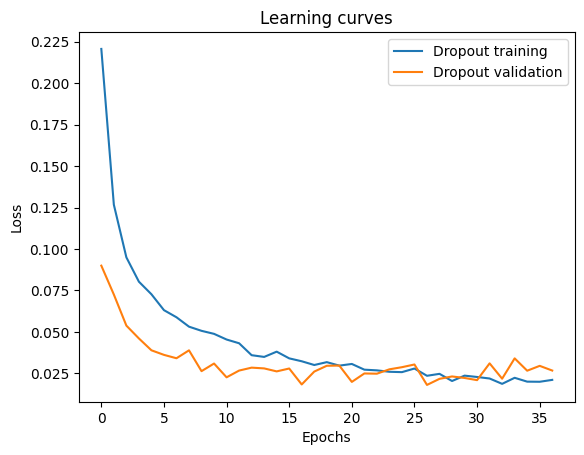

In [39]:
plot_learning_curves(history_bn, label="Batch Normalization")
plot_learning_curves(history_dropout, label="Dropout")

**2. Transfer learning.**

**a. Create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one.**

**b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?**

**c. Try caching the frozen layers, and train the model again: how much faster is it now?**

**d. Try again reusing just four hidden layers instead of five. Can you achieve a higher precision?**

**e. Now unfreeze the top two hidden layers and continue training: can you get the model to perform even better?**

**Ans:**

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
# Load the pretrained model
pretrained_model = keras.models.load_model("my_mnist_model.h5")
pretrained_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 5)                 505       
                                                                 
Total params: 266,105
Trainable params: 266,105
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Create a new DNN that reuses all the pretrained hidden layers of the previous model
new_model = keras.models.Sequential(pretrained_model.layers[:-1])

In [43]:
# Freeze the reused layers
for layer in new_model.layers:
    layer.trainable = False

In [44]:
# Add a new softmax output layer with the desired number of units
new_model.add(keras.layers.Dense(5, activation="softmax"))

In [45]:
# Compile the new model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [46]:
# Load the training data for digits 5 to 9
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train[y_train >= 5]
y_train = y_train[y_train >= 5] - 5
X_test = X_test[y_test >= 5]
y_test = y_test[y_test >= 5] - 5

In [48]:
 # Train the new model on digits 5 to 9 using only 100 images per digit
history = new_model.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
16/16 [==============================] - 1s 32ms/step - loss: 4307.7217 - accuracy: 0.5180 - val_loss: 2598.1479 - val_accuracy: 0.5890
Epoch 2/10
16/16 [==============================] - 0s 21ms/step - loss: 1763.8701 - accuracy: 0.7060 - val_loss: 1667.8774 - val_accuracy: 0.6490
Epoch 3/10
16/16 [==============================] - 0s 19ms/step - loss: 1083.4775 - accuracy: 0.7460 - val_loss: 1610.0925 - val_accuracy: 0.7079
Epoch 4/10
16/16 [==============================] - 0s 19ms/step - loss: 905.3940 - accuracy: 0.7880 - val_loss: 1757.8708 - val_accuracy: 0.6591
Epoch 5/10
16/16 [==============================] - 0s 18ms/step - loss: 2200.0759 - accuracy: 0.7020 - val_loss: 1118.3624 - val_accuracy: 0.7819
Epoch 6/10
16/16 [==============================] - 0s 18ms/step - loss: 715.2824 - accuracy: 0.8220 - val_loss: 905.8640 - val_accuracy: 0.8079
Epoch 7/10
16/16 [==============================] - 0s 18ms/step - loss: 474.4525 - accuracy: 0.8580 - val_loss: 1208.306

In [49]:
# Evaluate the trained model
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

152/152 [==============================] - 0s 2ms/step - loss: 919.6008 - accuracy: 0.7910
Test accuracy: 0.7909895181655884


In [50]:
# Try caching the frozen layers and train the model again
new_model.layers[0].trainable = True
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
16/16 [==============================] - 1s 30ms/step - loss: 541.1556 - accuracy: 0.8360 - val_loss: 783.7675 - val_accuracy: 0.8276
Epoch 2/10
16/16 [==============================] - 0s 18ms/step - loss: 274.7602 - accuracy: 0.8980 - val_loss: 663.4870 - val_accuracy: 0.8402
Epoch 3/10
16/16 [==============================] - 0s 18ms/step - loss: 545.8695 - accuracy: 0.8260 - val_loss: 1182.5072 - val_accuracy: 0.7638
Epoch 4/10
16/16 [==============================] - 0s 18ms/step - loss: 372.7621 - accuracy: 0.8740 - val_loss: 677.4314 - val_accuracy: 0.8459
Epoch 5/10
16/16 [==============================] - 0s 19ms/step - loss: 198.4601 - accuracy: 0.9140 - val_loss: 904.2610 - val_accuracy: 0.7984
Epoch 6/10
16/16 [==============================] - 0s 18ms/step - loss: 229.9938 - accuracy: 0.8740 - val_loss: 2327.8459 - val_accuracy: 0.6375
Epoch 7/10
16/16 [==============================] - 0s 18ms/step - loss: 855.9783 - accuracy: 0.8340 - val_loss: 696.0936 - val_

In [51]:
# Evaluate the trained model again
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

152/152 [==============================] - 0s 2ms/step - loss: 1248.1455 - accuracy: 0.7466
Test accuracy: 0.7465541958808899


In [52]:
# Try again reusing just four hidden layers instead of five
new_model2 = keras.models.Sequential(pretrained_model.layers[:-2])
for layer in new_model2.layers:
    layer.trainable = False
new_model2.add(keras.layers.Dense(5, activation="softmax"))
new_model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model2.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
16/16 [==============================] - 1s 29ms/step - loss: 788.8603 - accuracy: 0.6700 - val_loss: 253.1990 - val_accuracy: 0.8416
Epoch 2/10
16/16 [==============================] - 0s 17ms/step - loss: 165.6561 - accuracy: 0.9040 - val_loss: 249.0982 - val_accuracy: 0.8369
Epoch 3/10
16/16 [==============================] - 0s 20ms/step - loss: 98.8344 - accuracy: 0.9200 - val_loss: 155.2567 - val_accuracy: 0.8807
Epoch 4/10
16/16 [==============================] - 0s 17ms/step - loss: 53.6290 - accuracy: 0.9380 - val_loss: 153.1666 - val_accuracy: 0.8770
Epoch 5/10
16/16 [==============================] - 0s 17ms/step - loss: 42.6838 - accuracy: 0.9280 - val_loss: 217.9577 - val_accuracy: 0.8420
Epoch 6/10
16/16 [==============================] - 0s 17ms/step - loss: 53.3312 - accuracy: 0.9340 - val_loss: 258.4122 - val_accuracy: 0.8492
Epoch 7/10
16/16 [==============================] - 0s 17ms/step - loss: 26.7323 - accuracy: 0.9640 - val_loss: 148.4868 - val_accurac

In [53]:
# Evaluate the trained model again
test_loss, test_acc = new_model2.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

152/152 [==============================] - 0s 2ms/step - loss: 146.4952 - accuracy: 0.8871
Test accuracy: 0.887060284614563


In [54]:
# Now unfreeze the top two hidden layers and continue training
for layer in new_model2.layers[-3:]:
    layer.trainable = True
new_model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = new_model2.fit(X_train[:500], y_train[:500], epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
16/16 [==============================] - 1s 31ms/step - loss: 656612.4375 - accuracy: 0.4840 - val_loss: 183.0802 - val_accuracy: 0.2804
Epoch 2/10
16/16 [==============================] - 0s 17ms/step - loss: 25.1795 - accuracy: 0.2920 - val_loss: 2.3482 - val_accuracy: 0.2800
Epoch 3/10
16/16 [==============================] - 0s 17ms/step - loss: 1.4871 - accuracy: 0.2640 - val_loss: 2.3337 - val_accuracy: 0.2864
Epoch 4/10
16/16 [==============================] - 0s 18ms/step - loss: 1.4302 - accuracy: 0.3220 - val_loss: 2.2555 - val_accuracy: 0.3752
Epoch 5/10
16/16 [==============================] - 0s 18ms/step - loss: 1.3692 - accuracy: 0.3580 - val_loss: 2.2578 - val_accuracy: 0.4020
Epoch 6/10
16/16 [==============================] - 0s 18ms/step - loss: 1.3724 - accuracy: 0.3660 - val_loss: 2.2674 - val_accuracy: 0.3853
Epoch 7/10
16/16 [==============================] - 0s 18ms/step - loss: 1.3481 - accuracy: 0.3580 - val_loss: 2.3200 - val_accuracy: 0.4036
Epoch

In [55]:
# Evaluate the trained model again
test_loss, test_acc = new_model2.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

152/152 [==============================] - 0s 2ms/step - loss: 2.2901 - accuracy: 0.4193
Test accuracy: 0.4192552864551544


**3. Pretraining on an auxiliary task.**

**a. In this exercise you will build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not. Then you will reuse the lower layers of this network to train an MNIST classifier using very little training data. Start by building two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer: each DNN should have five hidden layers of 100 neurons each, He initialization, and ELU activation. Next, add one more hidden layer with 10 units on top of both DNNs. To do this, you should use TensorFlow’s concat() function with axis=1 to concatenate the outputs of both DNNs for each instance, then feed the result to the hidden layer. Finally, add an output layer with a single neuron using the logistic activation function.**

**b. Split the MNIST training set in two sets: split #1 should containing 55,000 images, and split #2 should contain contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split #1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes.**

**c. Train the DNN on this training set. For each image pair, you can simultaneously feed the first image to DNN A and the second image to DNN B. The whole network will gradually learn to tell whether two images belong to the same class or not.**

**d. Now create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons. Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class.**

**Ans:**

In [56]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [57]:
# Load the MNIST dataset and split it into two sets
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train1 = X_train_full[:55000]
y_train1 = y_train_full[:55000]
X_train2 = X_train_full[55000:]
y_train2 = y_train_full[55000:]

In [58]:
# Define a function to generate a training batch where each instance is a pair of MNIST images
def generate_batch(batch_size):
    X_batch1 = np.empty((batch_size, 28, 28), dtype=np.float32)
    X_batch2 = np.empty((batch_size, 28, 28), dtype=np.float32)
    y_batch = np.empty((batch_size, 1), dtype=np.int32)
    for i in range(batch_size):
        index1 = np.random.randint(len(X_train1))
        X_batch1[i] = X_train1[index1]
        if i % 2 == 0:
            # Images from the same class
            index2 = index1
            while index2 == index1:
                index2 = np.random.randint(len(X_train1))
                if y_train1[index2] == y_train1[index1]:
                    break
            y_batch[i] = 0
        else:
            # Images from different classes
            index2 = index1
            while index2 == index1 or y_train1[index2] == y_train1[index1]:
                index2 = np.random.randint(len(X_train1))
            y_batch[i] = 1
        X_batch2[i] = X_train1[index2]
    return [X_batch1, X_batch2], y_batch

In [59]:
# Build two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer
def build_dnn():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    for _ in range(5):
        model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    return model

dnn_a = build_dnn()
dnn_b = build_dnn()

In [60]:
# Add one more hidden layer with 10 units on top of both DNNs
merged_output = keras.layers.concatenate([dnn_a.output, dnn_b.output])
hidden_layer = keras.layers.Dense(10, activation="elu", kernel_initializer="he_normal")(merged_output)

In [61]:
# Add an output layer with a single neuron using the logistic activation function
output_layer = keras.layers.Dense(1, activation="sigmoid")(hidden_layer)

In [62]:
# Create a new model that takes two MNIST images as inputs and outputs a single value representing whether the images belong to the same class or not
model = keras.models.Model(inputs=[dnn_a.input, dnn_b.input], outputs=[output_layer])

In [63]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [64]:
# Train the DNN on this training set
batch_size = 32
for epoch in range(10):
    for iteration in range(len(X_train1) // batch_size):
        X_batch, y_batch = generate_batch(batch_size)
        model.train_on_batch(X_batch, y_batch)

In [65]:
# Create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons
new_model = keras.models.Sequential(dnn_a.layers[:-1])
for layer in new_model.layers:
    layer.trainable = False

new_model.add(keras.layers.Dense(10, activation="softmax"))

In [66]:
# Compile the new model
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [67]:
# Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class
history = new_model.fit(X_train2, y_train2, epochs=10)

Epoch 1/10
157/157 [==============================] - 1s 2ms/step - loss: 2.5389 - accuracy: 0.2322
Epoch 2/10
157/157 [==============================] - 0s 2ms/step - loss: 2.0587 - accuracy: 0.2986
Epoch 3/10
157/157 [==============================] - 0s 2ms/step - loss: 1.9711 - accuracy: 0.3330
Epoch 4/10
157/157 [==============================] - 0s 2ms/step - loss: 1.9017 - accuracy: 0.3498
Epoch 5/10
157/157 [==============================] - 0s 2ms/step - loss: 1.8487 - accuracy: 0.3688
Epoch 6/10
157/157 [==============================] - 0s 2ms/step - loss: 1.8073 - accuracy: 0.3806
Epoch 7/10
157/157 [==============================] - 0s 2ms/step - loss: 1.7714 - accuracy: 0.3846
Epoch 8/10
157/157 [==============================] - 0s 2ms/step - loss: 1.7435 - accuracy: 0.3988
Epoch 9/10
157/157 [==============================] - 0s 2ms/step - loss: 1.7160 - accuracy: 0.4028
Epoch 10/10
157/157 [==============================] - 0s 2ms/step - loss: 1.6929 - accuracy: 0.4156

In [68]:
# Evaluate the trained model on the test set
test_loss, test_acc = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 1.7199 - accuracy: 0.3922
Test accuracy: 0.3921999931335449
